### Implementing simple Chatbot Using LangGraph

In [1]:
from typing_extensions import TypedDict, Annotated
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [2]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [3]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o")
llm.invoke("Hello")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_a288987b44', 'id': 'chatcmpl-Bn6c1RAQWfoAMhUwHXrvuQQ0jsLTK', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--37fd64dc-b585-4c25-916f-4dec45382b05-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [5]:
from langchain_groq import ChatGroq

llm_groq = ChatGroq(model="qwen-qwq-32b")
llm_groq.invoke("Hey I am Vivek and I like to play soccer")

AIMessage(content="\n<think>\nOkay, the user is Vivek and he mentioned he likes to play soccer. I should respond in a friendly way. Let me start by greeting him and acknowledging his interest in soccer. Maybe ask him about his position or if he's part of a team. I should keep it open-ended to encourage more conversation. Also, I can suggest some related topics like favorite teams or players. Let me make sure the tone is positive and enthusiastic. Alright, let's put that together.\n</think>\n\nHey Vivek! That's awesome! Soccer is such a great sport. What position do you play? And do you play casually or are you part of a team? Also, who's your favorite soccer team or player? I'd love to chat more about the beautiful game! ⚽", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 158, 'prompt_tokens': 21, 'total_tokens': 179, 'completion_time': 0.384169542, 'prompt_time': 0.003327756, 'queue_time': 0.021322123999999998, 'total_time': 0.387497298}, 'model_name': 'q

### We Will start With Creating Nodes

In [6]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()
def superbot(state:State):
    return {"messages":[llm_groq.invoke(state['messages'])]}

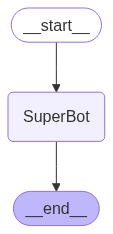

In [7]:
graph = StateGraph(State)

## node
graph.add_node("SuperBot",superbot)
## Edges
graph.add_edge(START, "SuperBot")
graph.add_edge("SuperBot", END)

graph_builder = graph.compile(checkpointer=memory)

## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [ ]:
## Invocation
config = {"configurable": {"thread_id": "1"}}

graph_builder.invoke({'messages':"Hi, My name is Vivek And I like Soccer"}, config)

{'messages': [HumanMessage(content='Hi, My name is Vivek And I like Soccer', additional_kwargs={}, response_metadata={}, id='b1deb1dc-8215-4a66-a931-2578aa52c925'),
  AIMessage(content="\n<think>\nOkay, the user introduced themselves as Vivek and mentioned they like soccer. I should respond warmly. Let me start by welcoming them and acknowledging their interest in soccer. Maybe ask them a question to keep the conversation going, like their favorite team or player. Keep it friendly and open-ended so they feel comfortable sharing more. I should also check for any typos and make sure the tone is positive and engaging.\n</think>\n\nHello Vivek! Welcome! It's great to meet you. Soccer is an amazing sport—do you have a favorite team or player? I'd love to chat more about it! 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 124, 'prompt_tokens': 21, 'total_tokens': 145, 'completion_time': 0.305878241, 'prompt_time': 0.003751416, 'queue_time': 0.020549073, 'tot

### Streaming 
Methods: .stream() and astream()

- These methods are sync and async methods for streaming back results.

Additional parameters in streaming modes for graph state

- **values** : This streams the full state of the graph after each node is called.
- **updates** : This streams updates to the state of the graph after each node is called.

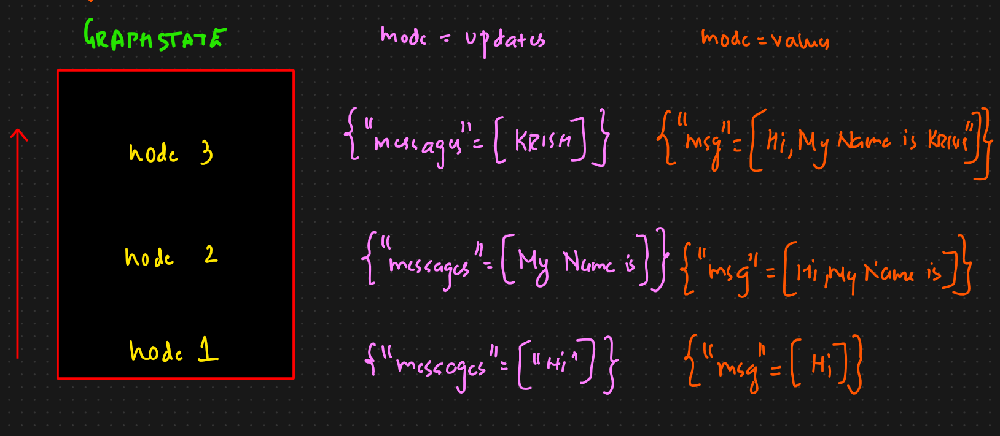

#### Streaming The Responses With Stream Method

In [9]:
# Create a thread
config = {"configurable": {"thread_id": "3"}}

for chunk in graph_builder.stream({'messages':"Hi, My name is Vivek And I like Soccer"}, config, stream_mode="updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content="\n<think>\nOkay, the user introduced themselves as Vivek and mentioned they like soccer. I should respond in a friendly way. Let me start by greeting them back. I'll mention their name to make it personal. Then acknowledge their interest in soccer. Maybe ask a follow-up question to keep the conversation going. I should keep it casual and open-ended. Let me check for any typos. Alright, that should work.\n</think>\n\nHi Vivek! Nice to meet you. 😊 Soccer is an amazing sport! Do you prefer playing it or watching it? And do you have a favorite team or player?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 122, 'prompt_tokens': 21, 'total_tokens': 143, 'completion_time': 0.286491755, 'prompt_time': 0.003403868, 'queue_time': 0.094445608, 'total_time': 0.289895623}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_a91d9c2cfb', 'finish_reason': 'stop', 'logprobs': None}, id='run--339acfef-b671-46eb-acb2-ddd5

In [10]:
for chunk in graph_builder.stream({'messages':"I also like Cricket"}, config, stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi, My name is Vivek And I like Soccer', additional_kwargs={}, response_metadata={}, id='d77be152-b0e1-478d-9a05-59a65a8393f5'), AIMessage(content="\n<think>\nOkay, the user introduced themselves as Vivek and mentioned they like soccer. I should respond in a friendly way. Let me start by greeting them back. I'll mention their name to make it personal. Then acknowledge their interest in soccer. Maybe ask a follow-up question to keep the conversation going. I should keep it casual and open-ended. Let me check for any typos. Alright, that should work.\n</think>\n\nHi Vivek! Nice to meet you. 😊 Soccer is an amazing sport! Do you prefer playing it or watching it? And do you have a favorite team or player?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 122, 'prompt_tokens': 21, 'total_tokens': 143, 'completion_time': 0.286491755, 'prompt_time': 0.003403868, 'queue_time': 0.094445608, 'total_time': 0.289895623}, 'model_name'

In [ ]:
for chunk in graph_builder.stream({'messages':"I also like Badminton"}, config, stream_mode="updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content='\n<think>\nOkay, the user mentioned they like soccer, then cricket, and now football. Wait, in some countries, "football" is the same as soccer. But maybe they mean something else? Let me check the previous messages again.\n\nFirst message: "I like Soccer". The assistant responded about soccer. Then the user says they also like Cricket. Now the user says, "I also like football". Since they already mentioned soccer, maybe "football" here refers to American football? Or maybe they\'re just listing sports again. Could be a repetition, but perhaps they want to clarify. \n\nI should consider the possibility that "football" in their context is different from soccer. Since the user is named Vivek, possibly from a country where "football" is soccer, but maybe they are in a place where American football is popular. Alternatively, they might be listing another sport. The assistant\'s job is to acknowledge and engage further. \n\nThe user might be try

In [12]:
for chunk in graph_builder.stream({'messages':"I love Sports"}, config, stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi, My name is Vivek And I like Soccer', additional_kwargs={}, response_metadata={}, id='d77be152-b0e1-478d-9a05-59a65a8393f5'), AIMessage(content="\n<think>\nOkay, the user introduced themselves as Vivek and mentioned they like soccer. I should respond in a friendly way. Let me start by greeting them back. I'll mention their name to make it personal. Then acknowledge their interest in soccer. Maybe ask a follow-up question to keep the conversation going. I should keep it casual and open-ended. Let me check for any typos. Alright, that should work.\n</think>\n\nHi Vivek! Nice to meet you. 😊 Soccer is an amazing sport! Do you prefer playing it or watching it? And do you have a favorite team or player?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 122, 'prompt_tokens': 21, 'total_tokens': 143, 'completion_time': 0.286491755, 'prompt_time': 0.003403868, 'queue_time': 0.094445608, 'total_time': 0.289895623}, 'model_name'

#### Streaming The Responses With astream Method

**Streaming tokens**
We often want to stream more than graph state.

In particular, with chat model calls it is common to stream the **tokens** as they are generated.

We can do this using the .astream_events method, which streams back events as they happen inside nodes!

Each event is a dict with a few keys:

- event: This is the type of event that is being emitted.
- name: This is the name of event.
- data: This is the data associated with the event.
- metadata: Contains langgraph_node, the node emitting the event.

In [13]:
config = {"configurable": {"thread_id": "3"}}

async for event in graph_builder.astream_events({"messages":["Hi My name is Vivek and I like to play cricket"]}, config, version="v2"):
    print(event)

{'event': 'on_chain_start', 'data': {'input': {'messages': ['Hi My name is Vivek and I like to play cricket']}}, 'name': 'LangGraph', 'tags': [], 'run_id': 'c66cbdae-15be-49f3-bf3c-51c499625b2f', 'metadata': {'thread_id': '3'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='Hi, My name is Vivek And I like Soccer', additional_kwargs={}, response_metadata={}, id='d77be152-b0e1-478d-9a05-59a65a8393f5'), AIMessage(content="\n<think>\nOkay, the user introduced themselves as Vivek and mentioned they like soccer. I should respond in a friendly way. Let me start by greeting them back. I'll mention their name to make it personal. Then acknowledge their interest in soccer. Maybe ask a follow-up question to keep the conversation going. I should keep it casual and open-ended. Let me check for any typos. Alright, that should work.\n</think>\n\nHi Vivek! Nice to meet you. 😊 Soccer is an amazing sport! Do you prefer playing it or watching it? And d